In [1]:
#Exploratory Data Analysis on Automobile Dataset

In [9]:
#importing necessary libraries
import numpy as np # for numerical function
import pandas as pd # for data preprocessing
import matplotlib.pyplot as plt # for data visualization
%matplotlib inline
import seaborn as sns
import datetime
import time
import os
import warnings
from google.colab import files

In [50]:
pd.set_option("display.max_columns",None)

In [3]:
#ignoring all the warnings
warnings.filterwarnings("ignore")

In [12]:
auto_data = files.upload()
auto_data

Saving Automobile_data.csv to Automobile_data (1).csv


{'Automobile_data.csv': b'symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price\r\n3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9,111,5000,21,27,13495\r\n3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9,111,5000,21,27,16500\r\n1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9,154,5000,19,26,16500\r\n2,164,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.4,10,102,5500,24,30,13950\r\n2,164,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.4,8,115,5500,18,22,17450\r\n2,?,audi,gas,std,two,sedan,fwd,front,99.8,177.3,66.3,53.1,2507

In [29]:
#reading the csv by Pandas module
auto_data = pd.read_csv("Automobile_data.csv")
auto_data.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.4,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.4,8.0,115,5500,18,22,17450


In [30]:
#get descriptive statistics
auto_data.describe()

,symboling,wheel-base,length,width,height,curb-weight,engine-size,compression-ratio,city-mpg,highway-mpg
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,10.142537,25.219512,30.751220
std,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,3.972040,6.542142,6.886443
min,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,7.000000,13.000000,16.000000
25%,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,8.600000,19.000000,25.000000
50%,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,9.000000,24.000000,30.000000
75%,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,9.400000,30.000000,34.000000
max,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,23.000000,49.000000,54.000000


In [31]:
#overall information of the data
auto_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized-losses  205 non-null    object 
 2   make               205 non-null    object 
 3   fuel-type          205 non-null    object 
 4   aspiration         205 non-null    object 
 5   num-of-doors       205 non-null    object 
 6   body-style         205 non-null    object 
 7   drive-wheels       205 non-null    object 
 8   engine-location    205 non-null    object 
 9   wheel-base         205 non-null    float64
 10  length             205 non-null    float64
 11  width              205 non-null    float64
 12  height             205 non-null    float64
 13  curb-weight        205 non-null    int64  
 14  engine-type        205 non-null    object 
 15  num-of-cylinders   205 non-null    object 
 16  engine-size        205 non

In [34]:
#missing values imputation
print(auto_data["normalized-losses"].unique())

auto_data.isnull().sum()

['?' '164' '158' '192' '188' '121' '98' '81' '118' '148' '110' '145' '137'
 '101' '78' '106' '85' '107' '104' '113' '150' '129' '115' '93' '142'
 '161' '153' '125' '128' '122' '103' '168' '108' '194' '231' '119' '154'
 '74' '186' '83' '102' '89' '87' '77' '91' '134' '65' '197' '90' '94'
 '256' '95']


symboling            0
normalized-losses    0
make                 0
fuel-type            0
aspiration           0
num-of-doors         0
body-style           0
drive-wheels         0
engine-location      0
wheel-base           0
length               0
width                0
height               0
curb-weight          0
engine-type          0
num-of-cylinders     0
engine-size          0
fuel-system          0
bore                 0
stroke               0
compression-ratio    0
horsepower           0
peak-rpm             0
city-mpg             0
highway-mpg          0
price                0
dtype: int64

In [35]:
#missing value imputation by mean
rand_data = auto_data["normalized-losses"].loc[auto_data["normalized-losses"]!="?"]
mean_df = rand_data.astype(str).astype(int).mean()
auto_data["normalized-losses"] = auto_data["normalized-losses"].replace("?", mean_df).astype(int)
auto_data["normalized-losses"].head(5)


0    122
1    122
2    122
3    164
4    164
Name: normalized-losses, dtype: int64

In [37]:
#get the unique values
print(auto_data.columns)
print("#####################################################")
print(auto_data["normalized-losses"].unique())
print("#####################################################")
print(auto_data["price"].unique())

Index(['symboling', 'normalized-losses', 'make', 'fuel-type', 'aspiration',
       'num-of-doors', 'body-style', 'drive-wheels', 'engine-location',
       'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-type',
       'num-of-cylinders', 'engine-size', 'fuel-system', 'bore', 'stroke',
       'compression-ratio', 'horsepower', 'peak-rpm', 'city-mpg',
       'highway-mpg', 'price'],
      dtype='object')
#####################################################
[122 164 158 192 188 121  98  81 118 148 110 145 137 101  78 106  85 107
 104 113 150 129 115  93 142 161 153 125 128 103 168 108 194 231 119 154
  74 186  83 102  89  87  77  91 134  65 197  90  94 256  95]
#####################################################
['13495' '16500' '13950' '17450' '15250' '17710' '18920' '23875' '?'
 '16430' '16925' '20970' '21105' '24565' '30760' '41315' '36880' '5151'
 '6295' '6575' '5572' '6377' '7957' '6229' '6692' '7609' '8558' '8921'
 '12964' '6479' '6855' '5399' '6529' '7129' '7295

In [38]:
rand_data = auto_data["price"].loc[auto_data.price!="?"]
mean_data = rand_data.astype(str).astype(int).mean()
auto_data["price"] = auto_data["price"].replace("?", mean_data.astype(int))
print(f"The unique values are {df.price.unique()}")
print(f"The head of the data is {df.price.head()}")

The unique values are ['13495' '16500' '13950' '17450' '15250' '17710' '18920' '23875' '?'
 '16430' '16925' '20970' '21105' '24565' '30760' '41315' '36880' '5151'
 '6295' '6575' '5572' '6377' '7957' '6229' '6692' '7609' '8558' '8921'
 '12964' '6479' '6855' '5399' '6529' '7129' '7295' '7895' '9095' '8845'
 '10295' '12945' '10345' '6785' '11048' '32250' '35550' '36000' '5195'
 '6095' '6795' '6695' '7395' '10945' '11845' '13645' '15645' '8495'
 '10595' '10245' '10795' '11245' '18280' '18344' '25552' '28248' '28176'
 '31600' '34184' '35056' '40960' '45400' '16503' '5389' '6189' '6669'
 '7689' '9959' '8499' '12629' '14869' '14489' '6989' '8189' '9279' '5499'
 '7099' '6649' '6849' '7349' '7299' '7799' '7499' '7999' '8249' '8949'
 '9549' '13499' '14399' '17199' '19699' '18399' '11900' '13200' '12440'
 '13860' '15580' '16900' '16695' '17075' '16630' '17950' '18150' '12764'
 '22018' '32528' '34028' '37028' '9295' '9895' '11850' '12170' '15040'
 '15510' '18620' '5118' '7053' '7603' '7126' '7775'

0    13495
1    16500
2    16500
3    13950
4    17450
Name: price, dtype: object

In [44]:
#getting the unique values
auto_data.horsepower.unique()

array([111, 154, 102, 115, 110, 140, 160, 101, 121, 182,  48,  70,  68,
        88, 145,  58,  76,  60,  86, 100,  78,  90, 176, 262, 135,  84,
        64, 120,  72, 123, 155, 184, 175, 116,  69,  55,  97, 152, 200,
        95, 142, 143, 207, 288, 104,  73,  82,  94,  62,  56, 112,  92,
       161, 156,  52,  85, 114, 162, 134, 106])

In [41]:
#replacing the values
data =auto_data['horsepower'].loc[auto_data['horsepower'] != '?']
mean_data = data.astype(str).astype(int).mean()
auto_data['horsepower'] = auto_data['horsepower'].replace('?',mean_data).astype(int)
auto_data['horsepower'].head()

0    111
1    111
2    154
3    102
4    115
Name: horsepower, dtype: int64

In [42]:
#getting the unique values
auto_data.horsepower.unique()

array([111, 154, 102, 115, 110, 140, 160, 101, 121, 182,  48,  70,  68,
        88, 145,  58,  76,  60,  86, 100,  78,  90, 176, 262, 135,  84,
        64, 120,  72, 123, 155, 184, 175, 116,  69,  55,  97, 152, 200,
        95, 142, 143, 207, 288, 104,  73,  82,  94,  62,  56, 112,  92,
       161, 156,  52,  85, 114, 162, 134, 106])

In [43]:
#unique values of peak rpm
auto_data["peak-rpm"].unique()

array(['5000', '5500', '5800', '4250', '5400', '5100', '4800', '6000',
       '4750', '4650', '4200', '4350', '4500', '5200', '4150', '5600',
       '5900', '5750', '?', '5250', '4900', '4400', '6600', '5300'],
      dtype=object)

In [46]:
#replacing the values
data =auto_data['peak-rpm'].loc[auto_data['peak-rpm'] != '?']
mean_data = data.astype(str).astype(int).mean()
auto_data['peak-rpm'] = auto_data['peak-rpm'].replace('?',mean_data).astype(int)
auto_data['peak-rpm'].head()
print(f"the uniques values of Peak Rpm are {auto_data['peak-rpm'].unique()}")


the uniques values of Peak Rpm are [5000 5500 5800 4250 5400 5100 4800 6000 4750 4650 4200 4350 4500 5200
 4150 5600 5900 5750 5125 5250 4900 4400 6600 5300]


In [53]:
#converting the columns to numeric
auto_data.bore = pd.to_numeric(auto_data.bore,errors="coerce")
auto_data.dtypes


symboling              int64
normalized-losses      int64
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                 float64
stroke                object
compression-ratio    float64
horsepower             int64
peak-rpm               int64
city-mpg               int64
highway-mpg            int64
price                 object
dtype: object

In [54]:
auto_data['peak-rpm'] = pd.to_numeric(auto_data['peak-rpm'],errors='coerce')
auto_data['stroke'] = pd.to_numeric(auto_data['stroke'],errors='coerce')

In [150]:
auto_data["num-of-doors"] = auto_data["num-of-doors"].replace("?",np.nan)


In [151]:
auto_data.isnull().sum()

symboling            0
normalized-losses    0
make                 0
fuel-type            0
aspiration           0
num-of-doors         2
body-style           0
drive-wheels         0
engine-location      0
wheel-base           0
length               0
width                0
height               0
curb-weight          0
engine-type          0
num-of-cylinders     0
engine-size          0
fuel-system          0
bore                 0
stroke               0
compression-ratio    0
horsepower           0
peak-rpm             0
city-mpg             0
highway-mpg          0
price                0
dtype: int64

In [152]:
#droppig the nan's as the size is very small
auto_data = auto_data.dropna()

In [58]:
#getting the shape the data
print(f"The data has {auto_data.shape[0]} observations and {auto_data.shape[1]} variables")

The data has 201 observations and 26 variables


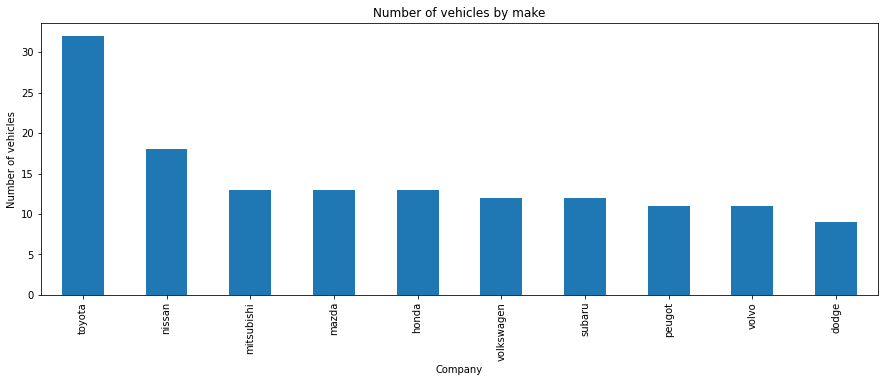

In [61]:
#manufacturers of cars in India
plt.figure(figsize=(10,10))
auto_data.make.value_counts().nlargest(10).plot(kind='bar', figsize=(15,5))
plt.title("Number of vehicles by make")
plt.ylabel('Number of vehicles')
plt.xlabel('Company')
plt.show()

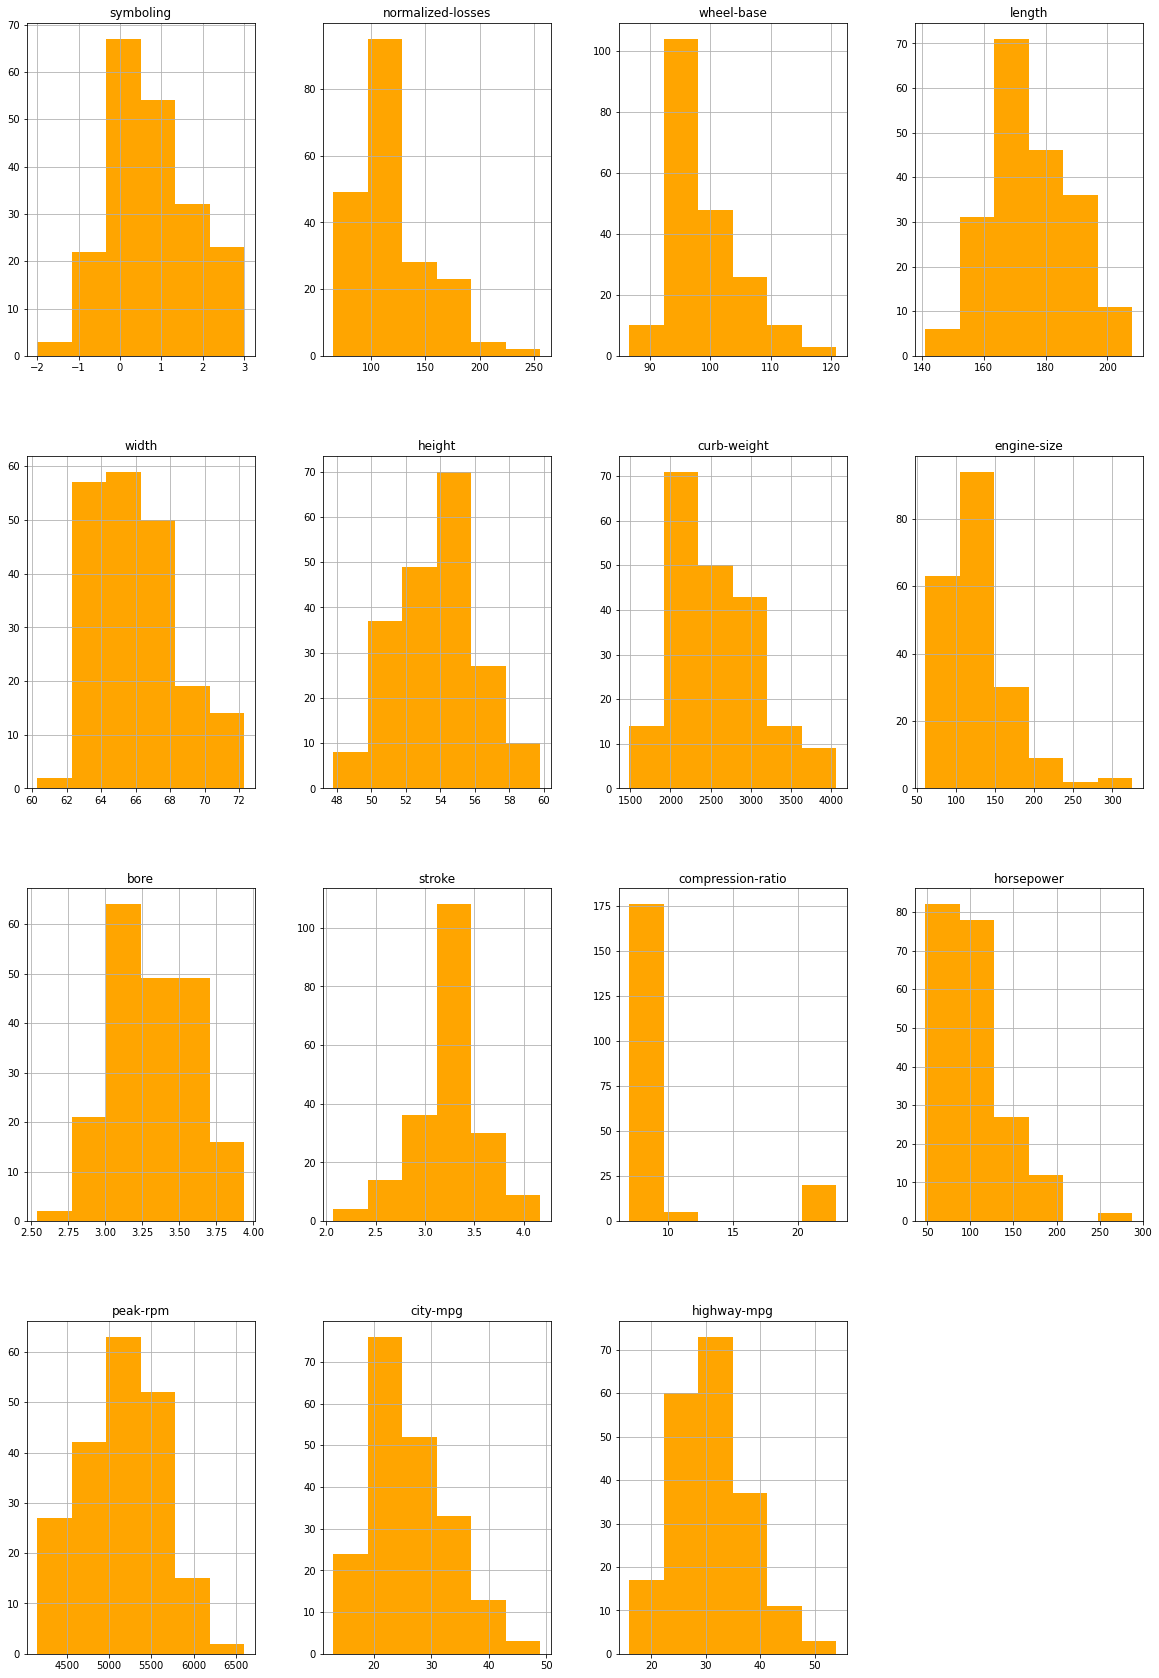

In [67]:
#plotting the histogram
auto_data.hist(bins=6, color="orange",figsize=(20,30))
plt.show()

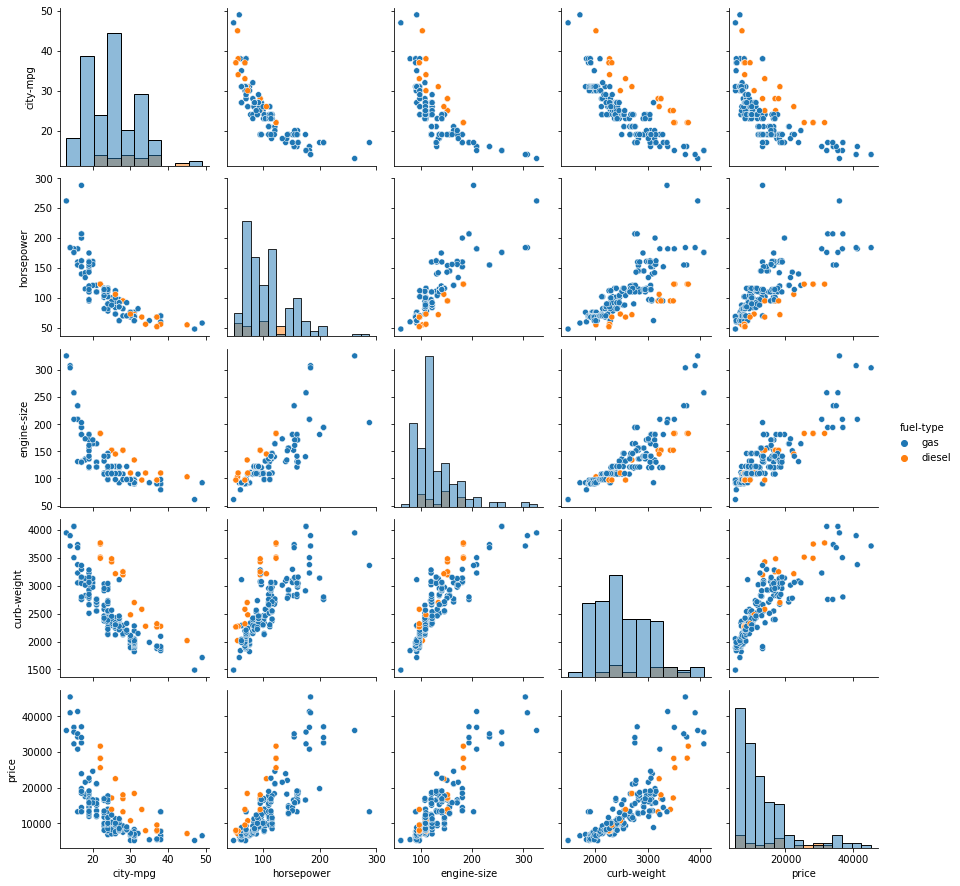

In [167]:
#scatterplots
sns.pairplot(auto_data[["city-mpg", "horsepower", "engine-size", "curb-weight","price", "fuel-type"]], hue="fuel-type", diag_kind="hist")

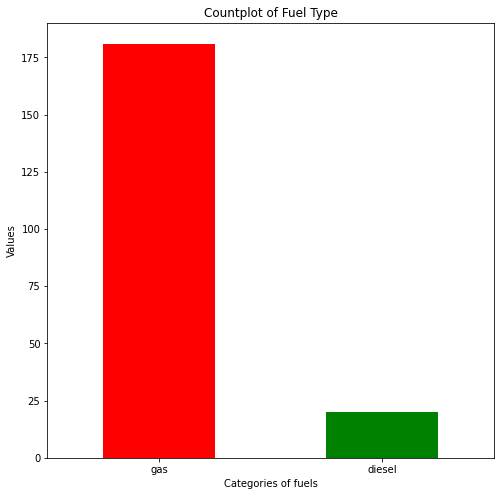

In [91]:
#getting the groupby count of fuel type
plt.figure(figsize=(8,8))
col = ["red","green"]
auto_data["fuel-type"].value_counts().plot(kind = "bar", color=col)
labes = ["Gas","Diesel"]
plt.xticks(rotation=360,)
plt.xlabel("Categories of fuels")
plt.ylabel("Values")
plt.title("Countplot of Fuel Type")
plt.show()

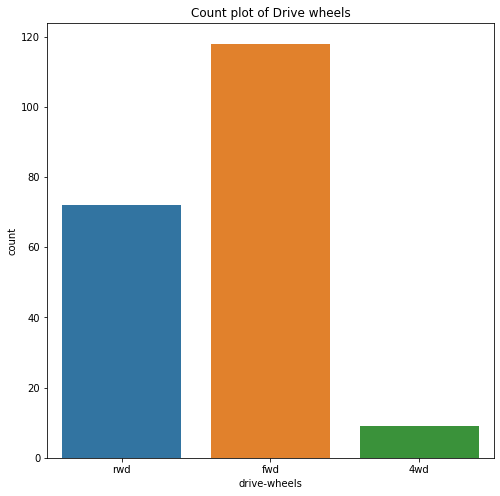

In [161]:
#drive wheels bar graph
plt.figure(figsize=(8,8))
sns.countplot(x="drive-wheels",data=auto_data)
plt.title("Count plot of Drive wheels")
plt.show()

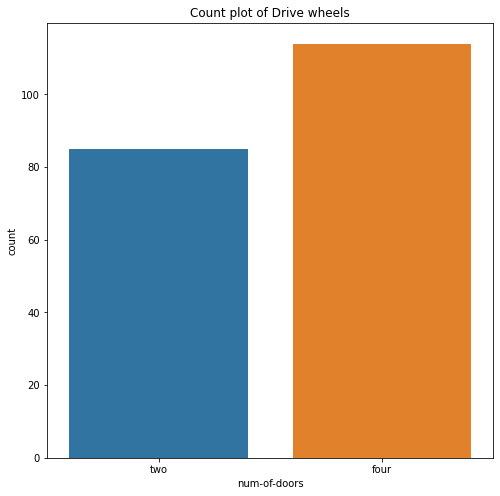

In [160]:
#num of doors bar graph
plt.figure(figsize=(8,8))
sns.countplot(x="num-of-doors",data=auto_data)
plt.title("Count plot of Drive wheels")
plt.show()

In [103]:
auto_data.price = pd.to_numeric(auto_data.price)

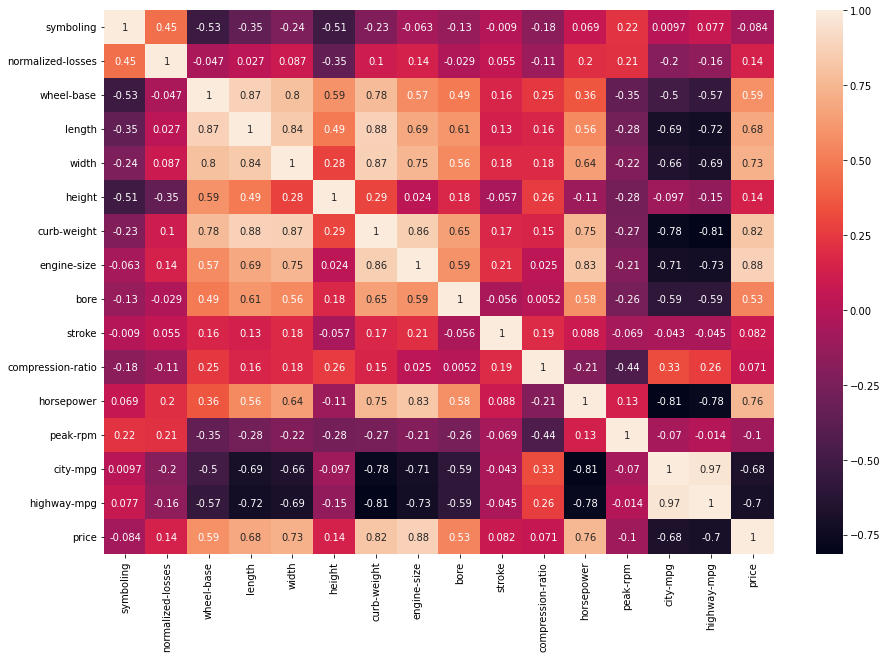

In [105]:
#correlation plot
plt.figure(figsize=(15,10))
corr_plot = auto_data.corr()
sns.heatmap(corr_plot,annot=True)

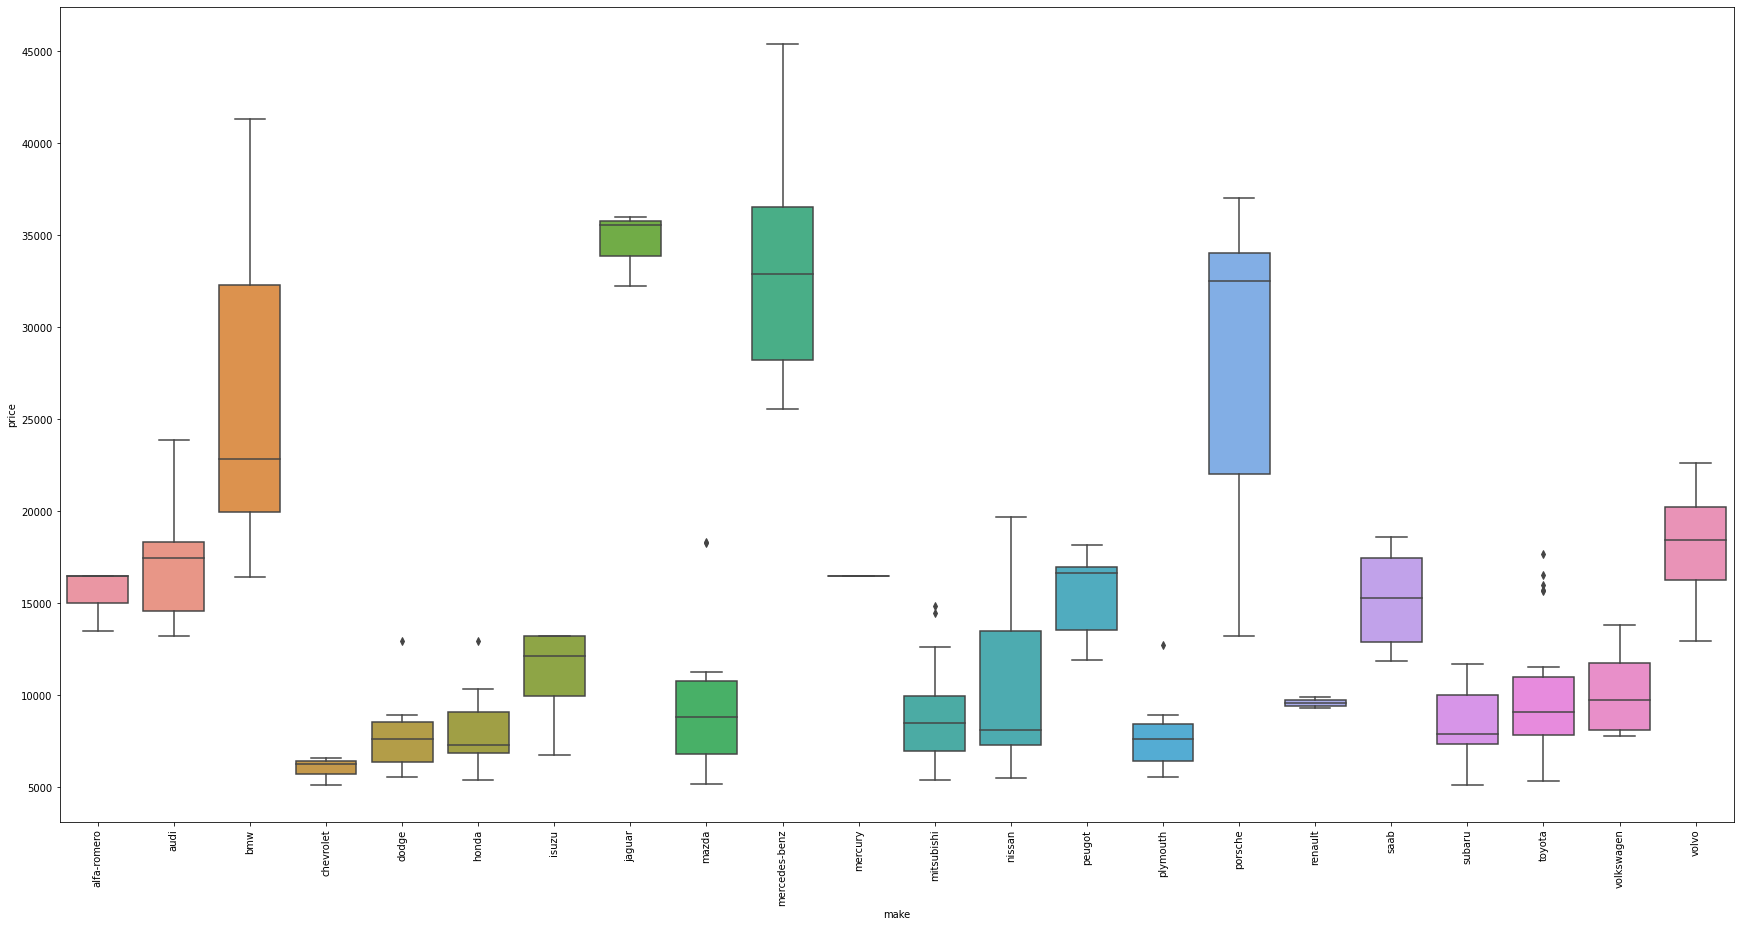

In [112]:
#boxplot of make and price
plt.rcParams['figure.figsize']=(30,15)
sns.boxplot(x="make",y="price", data =auto_data)
plt.xticks(rotation=90)
plt.show()

#info we acquired from this boxplot
#Mercedes-Benz makes the most expensive car, and Chevrolet
#makes the least expensive.

#BMW, Jaguar, Mercedes-Benz, and Porsche are the luxury
#automakers with vehicles costing over $20,000.

#Chevrolet, Dodge, Honda, Mitsubishi, Plymouth, and Subaru
#are less costly automobiles that cost less than $10,000.

#The remaining cars are in the largest group, between 10,000 and 20,000,
#where there are the most 

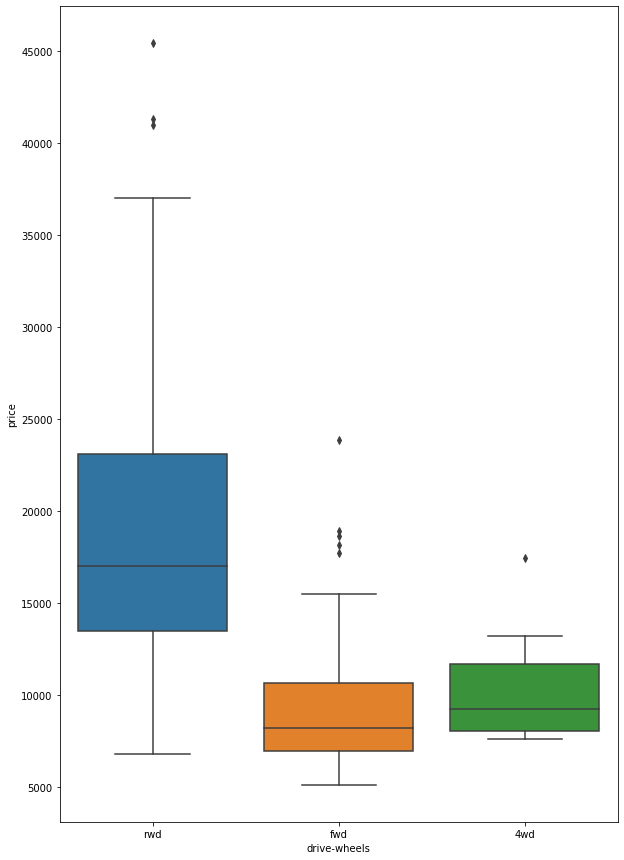

In [115]:
#boxplot of drive wheels and price
plt.rcParams['figure.figsize']=(10,15)
sns.boxplot(x="drive-wheels", y="price", data=auto_data)

The distribution has skeweness: 1.8110720844903971
The distribution has Kurtosis : 3.2410394874228263


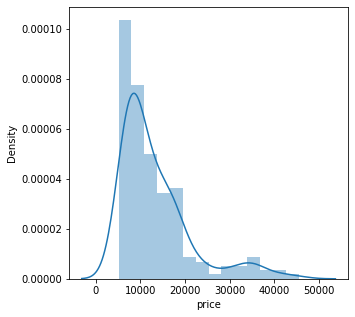

In [123]:
plt.figure(figsize=(5,5))
sns.distplot(auto_data["price"])
print(f"The distribution has skeweness: {auto_data.price.skew()}")
print(f"The distribution has Kurtosis : {auto_data.price.kurt()}")

Text(0.5, 1.0, 'Scatter plot of Price and Enginer Size')

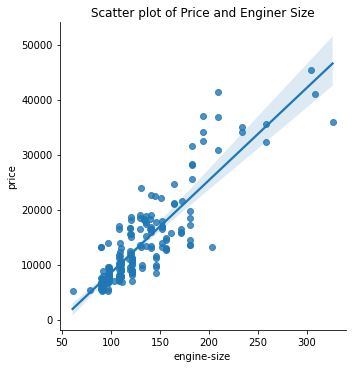

In [126]:
#by seeing the correaltion with the Price, we can plot this
#Engine size has strong correaltion to Price
sns.lmplot(y="price",x="engine-size", data = auto_data)
plt.title("Scatter plot of Price and Enginer Size")

Text(0.5, 1.0, 'Scatter plot of Price and Highway mpg')

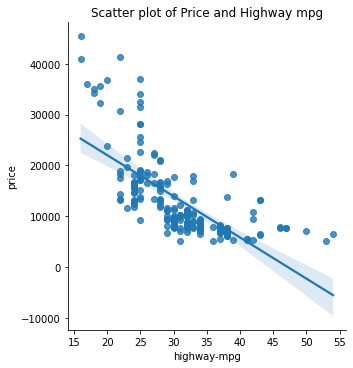

In [127]:
#negative corealtion bewteen Price and Highway mpg
sns.lmplot(y="price",x="highway-mpg", data = auto_data)
plt.title("Scatter plot of Price and Highway mpg")

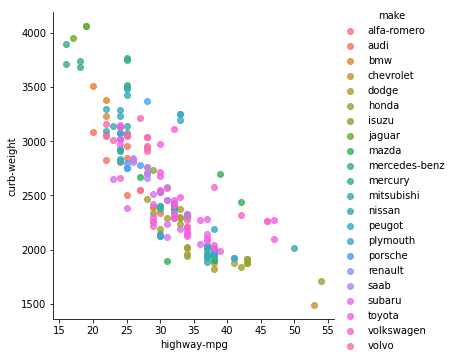

In [136]:
#Heavier the Automobile less is the mileage for both City and Highway
sns.lmplot('highway-mpg',"curb-weight",auto_data, hue="make",fit_reg=False)

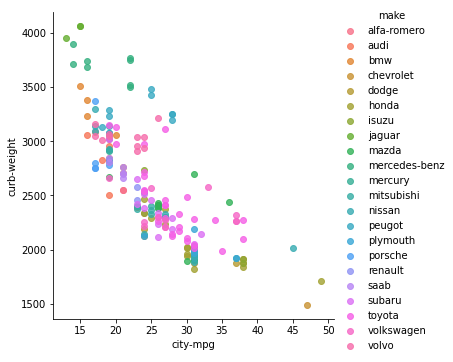

In [137]:
sns.lmplot('city-mpg',"curb-weight", auto_data, hue="make", fit_reg=False)

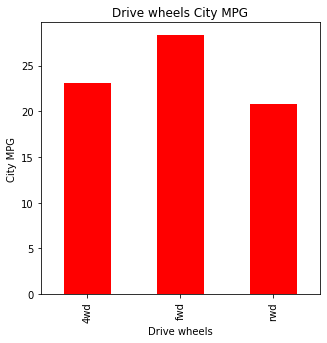

In [142]:
#drive wheels and city mpg bar plot
plt.figure(figsize=(5,5))
auto_data.groupby("drive-wheels")["city-mpg"].mean().plot(kind="bar",color="red")
plt.title("Drive wheels City MPG")
plt.ylabel('City MPG')
plt.xlabel('Drive wheels')
plt.show()

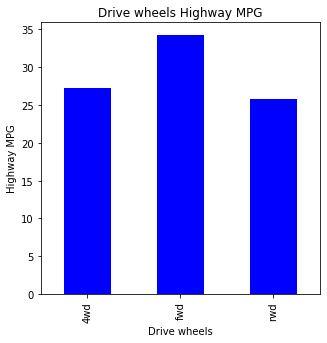

In [143]:
#bar plot of Drive wheels and Highway mpg
plt.figure(figsize=(5,5))
auto_data.groupby('drive-wheels')['highway-mpg'].mean().plot(kind='bar', color = 'blue');
plt.title("Drive wheels Highway MPG")
plt.ylabel('Highway MPG')
plt.xlabel('Drive wheels')
plt.show()


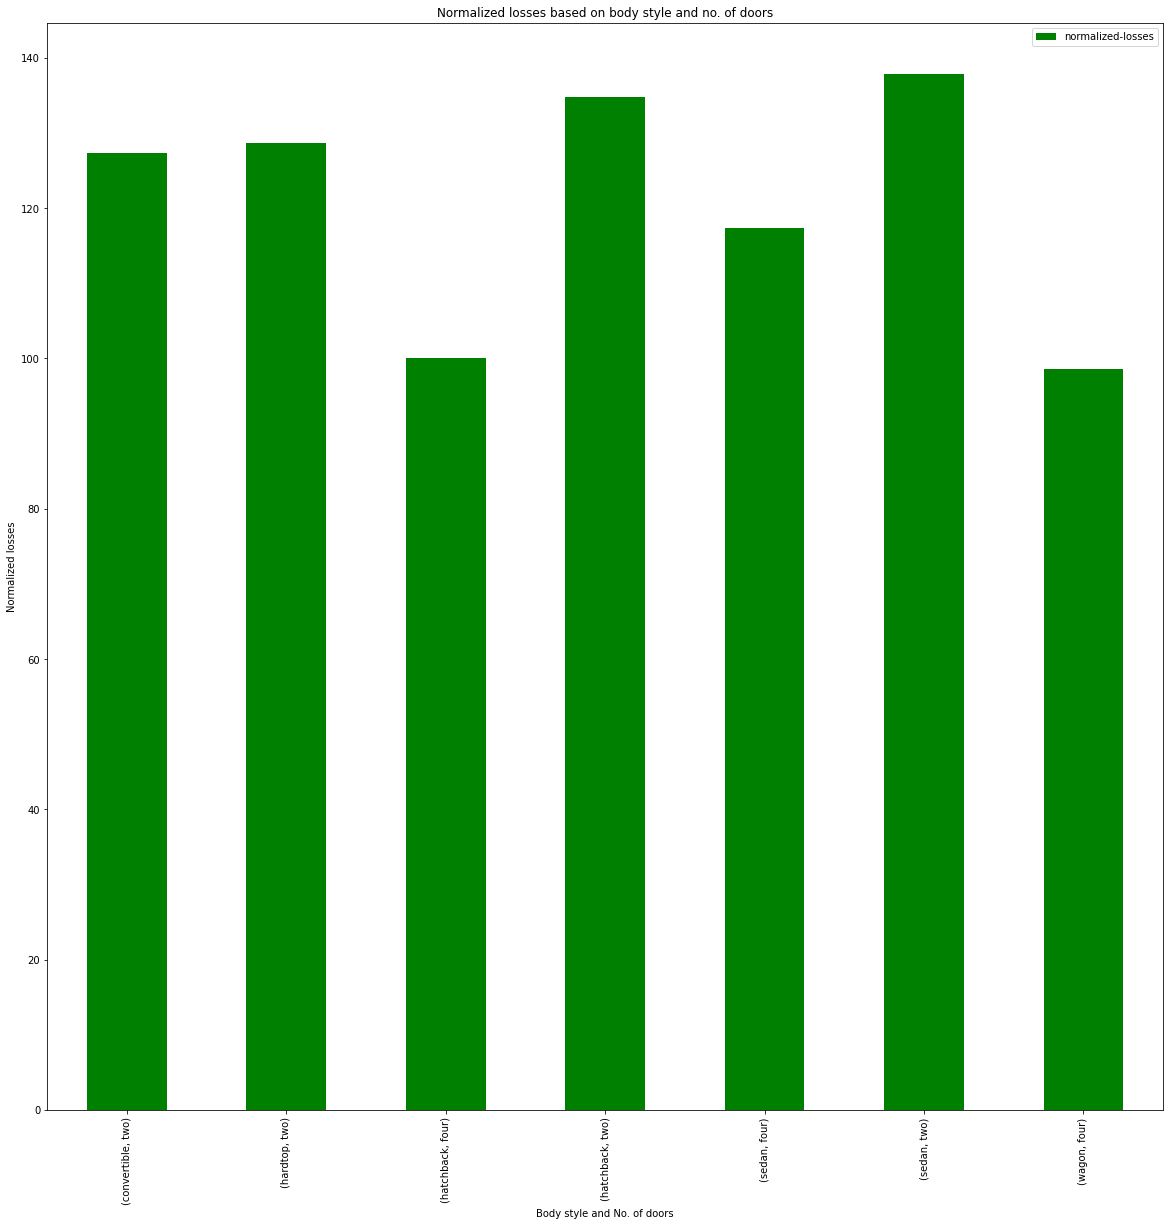

In [156]:
#We know that various aspects of the automobiles, 
#such as the body design and number of doors, are taken into account 
#when calculating the normalised loss, which is the average loss payout 
#per insured vehicle. The distribution of normalised losses varies by 
#body design, however the two-door automobile has a higher amount of 
#losses than the four-door car.'''
plt.rcParams['figure.figsize']=(20,20)
pd.pivot_table(auto_data,index=['body-style','num-of-doors'], values='normalized-losses').plot(kind='bar',color='green')
plt.title("Normalized losses based on body style and no. of doors")
plt.ylabel('Normalized losses')
plt.xlabel('Body style and No. of doors')
plt.show()